In [33]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city="Houston"
state="TX"
county="HARRIS COUNTY"
zipcode="7002"

chosen_cities=["Houston, TX", "San Francisco, CA", "New York, NY", "Chicago, IL", "Seattle, WA"]
chosen_zipcodes=["7006", "77004", "77008", "77055"]
chosen_counties=["HARRIS COUNTY", "MONTGOMERY COUNTY", "GALVESTON COUNTY", "TRINITY COUNTY", "FORT BEND COUNTY"]


In [2]:
# ---------------------------------- DATA IMPORT ----------------------------------
# Sourcing data from https://www.zillow.com/research/data/

In [3]:
# Creating a function to pull data from Zillow (in *.csv format)

def pull_zillow_data(url, state, county, city, var_name):
    # Read in data from Zillow live url reference   
    data=pd.read_csv(url)
    
    # Drop rows with NA entries     
    data=data.drop(['RegionID', 'SizeRank'],axis=1)
    
    # Identify columns not containing date reference
    id_vars=data.columns[~data.columns.str.contains('-')]

    # Transpose multiple date columns into Date vs Value format.
    melted_data=pd.melt(data,
                       id_vars=id_vars,
                       var_name="Date",
                       value_name=var_name)
    
    # return transposed df   
    return melted_data
   

In [4]:
# define a rangle of string variables with url links to live *.csv format data
# listing price
list_price_data="https://files.zillowstatic.com/research/public_v2/mlp/Metro_mlp_uc_sfrcondo_raw_month.csv"
# sale price
sale_data="https://files.zillowstatic.com/research/public_v2/median_sale_price/Metro_median_sale_price_uc_SFRCondo_raw_month.csv"

# inventory data (days to pending)
inventory_d2p_data="http://files.zillowstatic.com/research/public_v2/mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv"
# for sale inventory count
inventory_4s_data="https://files.zillowstatic.com/research/public_v2/invt_fs/Metro_invt_fs_uc_sfrcondo_raw_month.csv"

# ----------------------------------- DATA BY ZIP CODE -----------------------------------
zhvi_single_family_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_condo_coop_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_5plus_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_4_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_3_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_2_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_1_homes_by_zip="https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"

# ----------------------------------- DATA BY COUNTY -----------------------------------
zhvi_single_family_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_condo_coop_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_5plus_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_4_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_3_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_2_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
zhvi_1_homes_by_county="https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"


In [5]:
url_dict=[
# Data by CITY    
    {
        "stat_name"   : "list_price_data",
        "url"         : list_price_data,
        "description" : f"Median List Price: The median price at which homes across various geographies were listed.\nRaw. All homes. Monthly view."
    },
    {   "stat_name"   : "sale_data",
        "url"         : sale_data,
        "description" : f"Median Sale Price: The median price at which homes across various geographies were sold.\nRaw. All homes. Monthly view."
    },
    {   "stat_name"   : "inventory_d2p_data",
        "url"         : inventory_d2p_data,
        "description" : f"Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale."
    },
    {   "stat_name"   : "inventory_4s_data",
        "url"         : inventory_4s_data,
        "description" : f"For-Sale Inventory: The count of unique listings that were active at any time in a given month."
    },
# # Data by ZIP CODE    
#     {   "stat_name"   : "zhvi_single_family_homes_by_zip",
#         "url"         : zhvi_single_family_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll single family time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_condo_coop_homes_by_zip",
#         "url"         : zhvi_condo_coop_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll condo/co-op time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_5plus_homes_by_zip",
#         "url"         : zhvi_5plus_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n5+ bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_4_homes_by_zip",
#         "url"         : zhvi_4_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n4 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_3_homes_by_zip",
#         "url"         : zhvi_3_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n3 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_2_homes_by_zip",
#         "url"         : zhvi_2_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n2 bed time series by Zipcode"
#     },
#     {   "stat_name"   : "zhvi_1_homes_by_zip",
#         "url"         : zhvi_1_homes_by_zip,
#         "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n1 bed time series by Zipcode"
#     },
# Data by COUNTY        
    {   "stat_name"   : "zhvi_single_family_homes_by_county",
        "url"         : zhvi_single_family_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll single family time series by county"
    },
    {   "stat_name"   : "zhvi_condo_coop_homes_by_county",
        "url"         : zhvi_condo_coop_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\nAll condo/co-op time series by county"
    },
    {   "stat_name"   : "zhvi_5plus_homes_by_county",
        "url"         : zhvi_5plus_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n5+ bed time series by county"
    },
    {   "stat_name"   : "zhvi_4_homes_by_county",
        "url"         : zhvi_4_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n4 bed time series by county"
    },
    {   "stat_name"   : "zhvi_3_homes_by_county",
        "url"         : zhvi_3_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n3 bed time series by county"
    },
    {   "stat_name"   : "zhvi_2_homes_by_county",
        "url"         : zhvi_2_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n2 bed time series by county"
    },
    {   "stat_name"   : "zhvi_1_homes_by_county",
        "url"         : zhvi_1_homes_by_county,
        "description" : f"Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes.\n1 bed time series by county"}

]


zillow_df=pd.DataFrame(url_dict)
zillow_df['data']=""
zillow_df['type']=""
zillow_df

,stat_name,url,description,data,type
0,list_price_data,https://files.zillowstatic.com/research/public...,Median List Price: The median price at which h...,,
1,sale_data,https://files.zillowstatic.com/research/public...,Median Sale Price: The median price at which h...,,
2,inventory_d2p_data,http://files.zillowstatic.com/research/public_...,Days to Pending: How long it takes homes in a ...,,
3,inventory_4s_data,https://files.zillowstatic.com/research/public...,For-Sale Inventory: The count of unique listin...,,
4,zhvi_single_family_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,
5,zhvi_condo_coop_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,
6,zhvi_5plus_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,
7,zhvi_4_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,
8,zhvi_3_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,
9,zhvi_2_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",,


In [6]:
# Fill in illowdf dataframe's 'data' clumn with indvidual dataframes for each individual data source
for i, row in zillow_df.iterrows():
    
    url=row['url']
    var_name=zillow_df.loc[i]['stat_name']
    
    #   start filling in 'data' column with df output by pull_zllw_data f-n
    zillow_df.iloc[i]['data']=pull_zillow_data(url, state, county, city, var_name)

#     #   optionally create indemendent standalone data frames   
#     vars()[zillow_df.loc[i]['stat_name']+ "_df"]=zillow_df.iloc[i]['data']
    
    # Label data sources by entity type (zip code, city, county, country etc)    
    if 'County' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='County'
    elif 'Msa' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='City'
    elif 'Zip' in zillow_df.iloc[i]['data']['RegionType'].unique() :
        zillow_df.iloc[i]['type']='Zip'
        
    print(f"PROCESSNG................{var_name} ({zillow_df.iloc[i]['data'].shape})")    

PROCESSNG................list_price_data ((4074, 5))
PROCESSNG................sale_data ((15326, 5))
PROCESSNG................inventory_d2p_data ((3840, 5))
PROCESSNG................inventory_4s_data ((4074, 5))
PROCESSNG................zhvi_single_family_homes_by_county ((871568, 9))
PROCESSNG................zhvi_condo_coop_homes_by_county ((533824, 9))
PROCESSNG................zhvi_5plus_homes_by_county ((857584, 9))
PROCESSNG................zhvi_4_homes_by_county ((870048, 9))
PROCESSNG................zhvi_3_homes_by_county ((871568, 9))
PROCESSNG................zhvi_2_homes_by_county ((867920, 9))
PROCESSNG................zhvi_1_homes_by_county ((811072, 9))


In [75]:
# Add an empty column to the data frame as a placeholder for filtred dataframes
zillow_df['data_filtered']=""
zillow_df=zillow_df.set_index("stat_name")
zillow_df

,url,description,data,type,data_filtered
stat_name,,,,,
list_price_data,https://files.zillowstatic.com/research/public...,Median List Price: The median price at which h...,RegionName Regio...,City,
sale_data,https://files.zillowstatic.com/research/public...,Median Sale Price: The median price at which h...,RegionName Regi...,City,
inventory_d2p_data,http://files.zillowstatic.com/research/public_...,Days to Pending: How long it takes homes in a ...,RegionName Regio...,City,
inventory_4s_data,https://files.zillowstatic.com/research/public...,For-Sale Inventory: The count of unique listin...,RegionName Regio...,City,
zhvi_single_family_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_condo_coop_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_5plus_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_4_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,
zhvi_3_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,


In [76]:
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_city=pd.DataFrame(zillow_df[zillow_df['type']=='City'])
zillow_df_by_county=pd.DataFrame(zillow_df[zillow_df['type']=='County'])
# zillow_df_by_zip=zillow_df[zillow_df['type']=='Zip']

In [105]:
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_city=pd.DataFrame(zillow_df[zillow_df['type']=='City'])

# Filter out chosen cities
for i, row in zillow_df_by_city.iterrows():
    d=row['data']
    d['Date']=d['Date'].astype('datetime64[ns]')
    city_filter = d['RegionName'].isin(chosen_cities)
    zillow_df_by_city.loc[row.name]['data_filtered']=d[city_filter].sort_values(by='RegionName')

# zillow_df_by_city=zillow_df_by_city.set_index("stat_name")
zillow_df_by_city.loc['list_price_data','data_filtered']

,RegionName,RegionType,StateName,Date,list_price_data
1652,"Chicago, IL",Msa,IL,2019-04-30,347500.0
3883,"Chicago, IL",Msa,IL,2021-03-31,349900.0
682,"Chicago, IL",Msa,IL,2018-06-30,344900.0
2816,"Chicago, IL",Msa,IL,2020-04-30,329000.0
779,"Chicago, IL",Msa,IL,2018-07-31,335000.0
...,...,...,...,...,...
2052,"Seattle, WA",Msa,WA,2019-08-31,624900.0
1858,"Seattle, WA",Msa,WA,2019-06-30,648000.0
1761,"Seattle, WA",Msa,WA,2019-05-31,649950.0
2440,"Seattle, WA",Msa,WA,2019-12-31,630000.0


In [107]:
# Create subset data frames based on data type (city, zipcode, county etc)
zillow_df_by_county=pd.DataFrame(zillow_df[zillow_df['type']=='County'])

# Filter out chosen counties
for i, row in zillow_df_by_county.iterrows():
    d=row['data']
    d['Date']=d['Date'].astype('datetime64[ns]')
    d=d.drop(['Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', 'StateName'],axis=1)
    county_filter = d['RegionName'].str.upper().isin(chosen_counties)
    state_filter= d['State'].str.contains(state)
    zillow_df_by_county.loc[row.name]['data_filtered']=d[(county_filter) & (state_filter)].sort_values(by='RegionName')

zillow_df_by_county.loc['zhvi_2_homes_by_county']['data_filtered']

,RegionName,RegionType,State,Date,zhvi_2_homes_by_county
328546,Galveston County,County,TX,2005-08-31,115481.0
796766,Galveston County,County,TX,2019-04-30,172960.0
160101,Galveston County,County,TX,2000-09-30,95029.0
514121,Galveston County,County,TX,2011-01-31,113542.0
736811,Galveston County,County,TX,2017-07-31,154020.0
...,...,...,...,...,...
444648,Trinity County,County,TX,2008-12-31,61374.0
441793,Trinity County,County,TX,2008-11-30,61003.0
438938,Trinity County,County,TX,2008-10-31,60800.0
518878,Trinity County,County,TX,2011-02-28,59315.0


In [108]:
zillow_df_by_county

,url,description,data,type,data_filtered
stat_name,,,,,
zhvi_single_family_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_condo_coop_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_5plus_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_4_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_3_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_2_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...
zhvi_1_homes_by_county,https://files.zillowstatic.com/research/public...,"Zillow Home Value Index (ZHVI): A smoothed, se...",RegionName RegionType StateNam...,County,RegionName RegionType State ...


RegionName
Galveston County     AxesSubplot(0.125,0.125;0.775x0.755)
Harris County        AxesSubplot(0.125,0.125;0.775x0.755)
Montgomery County    AxesSubplot(0.125,0.125;0.775x0.755)
Trinity County       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

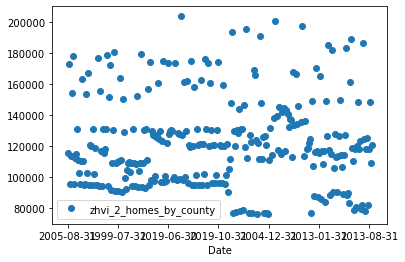

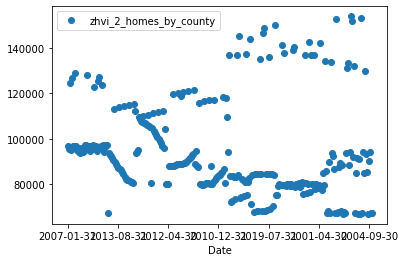

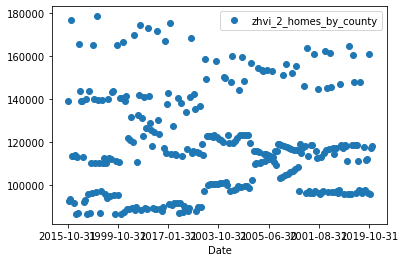

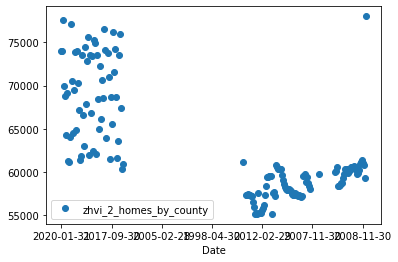

In [103]:
zillow_df_by_county.loc['zhvi_2_homes_by_county']['data_filtered'].groupby('RegionName').plot('Date','zhvi_2_homes_by_county',marker='o',linewidth=0)